Accuracy: 0.81
Precision: 0.79
Recall: 0.73
F1 Score: 0.76
Confusion Matrix:
[[135  22]
 [ 30  81]]


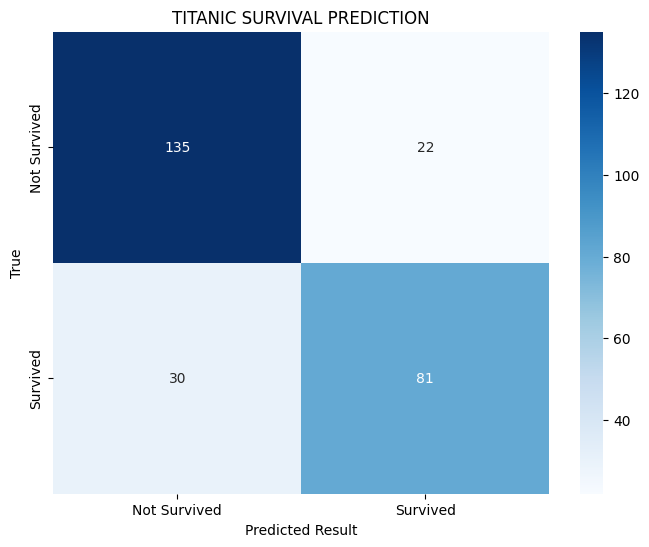

In [ ]:
                                             TITANIC SURVIVAL PREDICTION TASK 1


# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# 1. Load the Titanic dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Data Preprocessing
# Drop unnecessary columns
df = df.drop(columns=['Name', 'Ticket', 'Cabin'])

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Convert categorical variables to numerical
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Feature and Target selection
X = df.drop(columns=['Survived'])
y = df['Survived']

# Data Splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#  Model Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

#  Model Evaluation
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(cm)

#  Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'],
            yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted Result')
plt.ylabel('True')
plt.title('TITANIC SURVIVAL PREDICTION')
plt.show()